In [1]:
import pandas as pd
import numpy as np
import re
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.cluster import KMeans

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv('ML_2_Fellow.csv' ,encoding = 'unicode_escape')

In [3]:
data

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [4]:
data.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.isna().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [6]:
data = data.drop(data[data.Kode_Pelanggan.isnull()].index).reset_index(drop=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403182 entries, 0 to 403181
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         403182 non-null  object 
 1   Kode_Barang        403182 non-null  object 
 2   Barang             403182 non-null  object 
 3   Jumlah             403182 non-null  float64
 4   Tanggal_Transaksi  403182 non-null  object 
 5   Harga_Satuan       403182 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             403182 non-null  object 
dtypes: float64(3), object(5)
memory usage: 24.6+ MB


In [8]:
data['Barang'] = data['Barang'].str.replace('.','').str.upper().str.strip()
data['Barang'] = data['Barang'].replace('\s+',' ',regex = True)
data['Kode_Barang'] = data['Kode_Barang'].str.upper()
data['Negara'] = data['Negara'].str.upper()
data.head()

<ipython-input-8-bbee70758487>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Barang'] = data['Barang'].str.replace('.','').str.upper().str.strip()


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM


In [9]:
produk= data.groupby(['Kode_Barang','Barang'],as_index=False).count()
produk= produk.loc[:,['Kode_Barang','Barang']]

In [10]:
stok = produk.Kode_Barang.value_counts().to_frame()
liststok = list(stok[stok.Kode_Barang>1].index) 
produk[produk.Kode_Barang.isin(liststok)].head(10)

,Kode_Barang,Barang
100,17107D,FLOWER FAIRY 5 DRAWER LINERS
101,17107D,FLOWER FAIRY 5 SUMMER DRAW LINERS
119,20622,VIP PASSPORT COVER
120,20622,VIPPASSPORT COVER
172,20725,LUNCH BAG RED RETROSPOT
173,20725,LUNCH BAG RED SPOTTY
265,20914,SET/5 RED RETROSPOT LID GLASS BOWLS
266,20914,SET/5 RED SPOTTY LID GLASS BOWLS
402,21175,GIN + TONIC DIET METAL SIGN
403,21175,GIN AND TONIC DIET METAL SIGN


In [11]:
produk.drop_duplicates('Kode_Barang', keep='first', inplace=True)

In [12]:
data.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM


In [13]:
df = pd.merge(data,produk,on='Kode_Barang', how='left',validate='many_to_one')
df.drop('Barang_x',axis=1,inplace=True)
df.rename(columns={'Barang_y':'Barang'},inplace=True)
df.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang
0,536365,85123A,6.0,12/1/2010 8:26,2.55,17850.0,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM,WHITE METAL LANTERN
2,536365,84406B,8.0,12/1/2010 8:26,2.75,17850.0,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART


In [14]:
df[(df.Kode_Barang.str.len())<5].sort_values(by='Kode_Barang').head(10)

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang
199435,561631,C2,1.0,7/28/2011 14:27,50.0,14911.0,EIRE,CARRIAGE
25735,539688,C2,1.0,12/21/2010 11:00,150.0,12678.0,FRANCE,CARRIAGE
153685,555858,C2,1.0,6/7/2011 14:12,50.0,14911.0,EIRE,CARRIAGE
65813,544934,C2,1.0,2/25/2011 9:01,50.0,13345.0,UNITED KINGDOM,CARRIAGE
385785,579910,C2,1.0,12/1/2011 8:52,50.0,14911.0,EIRE,CARRIAGE
26460,539984,C2,1.0,12/23/2010 14:58,50.0,14911.0,EIRE,CARRIAGE
177371,558908,C2,1.0,7/5/2011 9:06,50.0,13338.0,UNITED KINGDOM,CARRIAGE
240209,566261,C2,1.0,9/11/2011 12:46,50.0,13372.0,UNITED KINGDOM,CARRIAGE
312387,572969,C2,1.0,10/27/2011 10:46,50.0,13363.0,UNITED KINGDOM,CARRIAGE
27652,C540164,C2,-1.0,1/5/2011 12:02,50.0,14911.0,EIRE,CARRIAGE


In [15]:
df = df.drop(df[(df.Kode_Barang.str.len())<5].index).reset_index(drop=True)

In [16]:
df.describe(include='all')

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang
count,401274,401274,401274.000000,401274,401274.000000,401274.000000,401274,401274
unique,21769,3596,NaN,20117,NaN,NaN,37,3571
top,576339,85123A,NaN,11/14/2011 15:27,NaN,NaN,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER
freq,534,2077,NaN,534,NaN,NaN,357894,2077
mean,NaN,NaN,12.081314,NaN,2.911377,15295.223202,NaN,NaN
std,NaN,NaN,173.102021,NaN,4.443641,1710.797005,NaN,NaN
min,NaN,NaN,-74215.000000,NaN,0.000000,12346.000000,NaN,NaN
25%,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,1.950000,15159.000000,NaN,NaN
75%,NaN,NaN,12.000000,NaN,3.750000,16794.000000,NaN,NaN


In [17]:
df['Kode_Pelanggan'] = 'C' + df.Kode_Pelanggan.astype('int').astype('str')
df.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang
0,536365,85123A,6.0,12/1/2010 8:26,2.55,C17850,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,6.0,12/1/2010 8:26,3.39,C17850,UNITED KINGDOM,WHITE METAL LANTERN
2,536365,84406B,8.0,12/1/2010 8:26,2.75,C17850,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6.0,12/1/2010 8:26,3.39,C17850,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6.0,12/1/2010 8:26,3.39,C17850,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART


In [18]:
df[(df.Jumlah<1) & (~df.Kode_Bayar.str.startswith('C'))]

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang


In [19]:
df.Negara.value_counts()

UNITED KINGDOM          357894
GERMANY                   9049
FRANCE                    8136
EIRE                      7323
SPAIN                     2448
NETHERLANDS               2314
BELGIUM                   1962
SWITZERLAND               1833
PORTUGAL                  1431
AUSTRALIA                 1249
NORWAY                    1053
ITALY                      773
CHANNEL ISLANDS            748
FINLAND                    645
CYPRUS                     612
SWEDEN                     434
AUSTRIA                    385
DENMARK                    371
JAPAN                      347
POLAND                     335
USA                        291
ISRAEL                     247
UNSPECIFIED                242
SINGAPORE                  214
ICELAND                    181
CANADA                     146
GREECE                     141
MALTA                      122
UNITED ARAB EMIRATES        66
EUROPEAN COMMUNITY          58
RSA                         57
LEBANON                     45
LITHUANI

In [20]:
Pelanggan = df.groupby('Kode_Pelanggan')['Negara'].unique()
Pelanggan.loc[Pelanggan.apply(lambda x:len(x)>1)]

Kode_Pelanggan
C12370           [CYPRUS, AUSTRIA]
C12394          [BELGIUM, DENMARK]
C12417            [BELGIUM, SPAIN]
C12422    [AUSTRALIA, SWITZERLAND]
C12429          [DENMARK, AUSTRIA]
C12431        [AUSTRALIA, BELGIUM]
C12455             [CYPRUS, SPAIN]
C12457       [SWITZERLAND, CYPRUS]
Name: Negara, dtype: object

In [21]:
for i,v in data.groupby('Kode_Pelanggan')['Negara'].unique().items():
    if len(v)>1:
        data.Negara[data['Kode_Pelanggan'] == i] = data.Negara[data['Kode_Pelanggan'] == i].mode()[0]

<ipython-input-21-16adc29c9f2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Negara[data['Kode_Pelanggan'] == i] = data.Negara[data['Kode_Pelanggan'] == i].mode()[0]
<ipython-input-21-16adc29c9f2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Negara[data['Kode_Pelanggan'] == i] = data.Negara[data['Kode_Pelanggan'] == i].mode()[0]
<ipython-input-21-16adc29c9f2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Neg

In [22]:
df = df.drop(df[df.Negara.isin(['Unspecified','European Community'])].index).reset_index(drop=True)

In [23]:
data.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,12/1/2010 8:26,3.39,17850.0,UNITED KINGDOM


In [24]:
df.isna().sum()

Kode_Bayar           0
Kode_Barang          0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
Barang               0
dtype: int64

In [25]:
df['Tanggal_Transaksi'] = pd.to_datetime(data['Tanggal_Transaksi'], errors='coerce')
df['Tahun'] = df['Tanggal_Transaksi'].dt.year
df['Bulan'] = df['Tanggal_Transaksi'].dt.month
df['Jam'] = df['Tanggal_Transaksi'].dt.hour

In [26]:
df.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang,Tahun,Bulan,Jam
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,C17850,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER,2010,12,8
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,WHITE METAL LANTERN,2010,12,8
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,C17850,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER,2010,12,8
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,8
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART,2010,12,8


In [28]:
df['Bulan_Tahun'] = pd.to_datetime(df['Tanggal_Transaksi']).dt.to_period('M')
df.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang,Tahun,Bulan,Jam,Bulan_Tahun
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,C17850,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER,2010,12,8,2010-12
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,WHITE METAL LANTERN,2010,12,8,2010-12
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,C17850,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER,2010,12,8,2010-12
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,8,2010-12
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART,2010,12,8,2010-12


In [29]:
df['Total'] = round(df['Jumlah'] * df['Harga_Satuan'],2)
df.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang,Tahun,Bulan,Jam,Bulan_Tahun,Total
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,C17850,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER,2010,12,8,2010-12,15.30
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,WHITE METAL LANTERN,2010,12,8,2010-12,20.34
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,C17850,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER,2010,12,8,2010-12,22.00
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,8,2010-12,20.34
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART,2010,12,8,2010-12,20.34


In [30]:
df.to_csv('clean_data.csv')

In [31]:
#Question
#Scenario
#This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. Please answer the question below and explore your creativity. 

#Some goals of this project:
#1.	What items customers buy the most and are there any items we should ignore?
#2.	What is our strategy to increase sales based on our export destination countries?
#3.	Do customer segmentation appropriately. Please explain in detail and completely
#4.	Get the hidden insight from the data


In [32]:
# Data Wragling

In [33]:
#EDA

In [34]:
data1 = pd.read_csv('clean_data.csv', index_col=[0], encoding = 'unicode_escape')
data1.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang,Tahun,Bulan,Jam,Bulan_Tahun,Total
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,C17850,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER,2010,12,8,2010-12,15.30
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,WHITE METAL LANTERN,2010,12,8,2010-12,20.34
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,C17850,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER,2010,12,8,2010-12,22.00
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,8,2010-12,20.34
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART,2010,12,8,2010-12,20.34


In [35]:
data1['Negara'].unique()

array(['UNITED KINGDOM', 'FRANCE', 'AUSTRALIA', 'NETHERLANDS', 'GERMANY',
       'NORWAY', 'EIRE', 'SWITZERLAND', 'SPAIN', 'POLAND', 'PORTUGAL',
       'ITALY', 'BELGIUM', 'LITHUANIA', 'JAPAN', 'ICELAND',
       'CHANNEL ISLANDS', 'DENMARK', 'CYPRUS', 'SWEDEN', 'AUSTRIA',
       'ISRAEL', 'FINLAND', 'GREECE', 'SINGAPORE', 'LEBANON',
       'UNITED ARAB EMIRATES', 'SAUDI ARABIA', 'CZECH REPUBLIC', 'CANADA',
       'UNSPECIFIED', 'BRAZIL', 'USA', 'EUROPEAN COMMUNITY', 'BAHRAIN',
       'MALTA', 'RSA'], dtype=object)

In [36]:
data1[data1['Negara']=='POLAND'].head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang,Tahun,Bulan,Jam,Bulan_Tahun,Total
4447,536971,21733,32.0,2010-12-03 12:48:00,2.55,C12779,POLAND,RED HANGING HEART T-LIGHT HOLDER,2010,12,12,2010-12,81.60
4448,536971,21232,24.0,2010-12-03 12:48:00,1.25,C12779,POLAND,STRAWBERRY CERAMIC TRINKET BOX,2010,12,12,2010-12,30.00
4449,536971,37446,8.0,2010-12-03 12:48:00,1.45,C12779,POLAND,MINI CAKE STAND WITH HANGING CAKES,2010,12,12,2010-12,11.60
4450,536971,37448,24.0,2010-12-03 12:48:00,1.49,C12779,POLAND,CERAMIC CAKE DESIGN SPOTTED MUG,2010,12,12,2010-12,35.76
4451,536971,21700,24.0,2010-12-03 12:48:00,0.85,C12779,POLAND,BIG DOUGHNUT FRIDGE MAGNETS,2010,12,12,2010-12,20.40


In [37]:
data1['Kode_Bayar'].nunique()

21769

In [38]:
Kel_Negara = data1[['Negara', 'Kode_Bayar']].groupby('Negara').count().sort_values('Kode_Bayar', axis=0, ascending=False)
Kel_Negara.head()

,Kode_Bayar
Negara,
UNITED KINGDOM,357894
GERMANY,9049
FRANCE,8136
EIRE,7323
SPAIN,2448


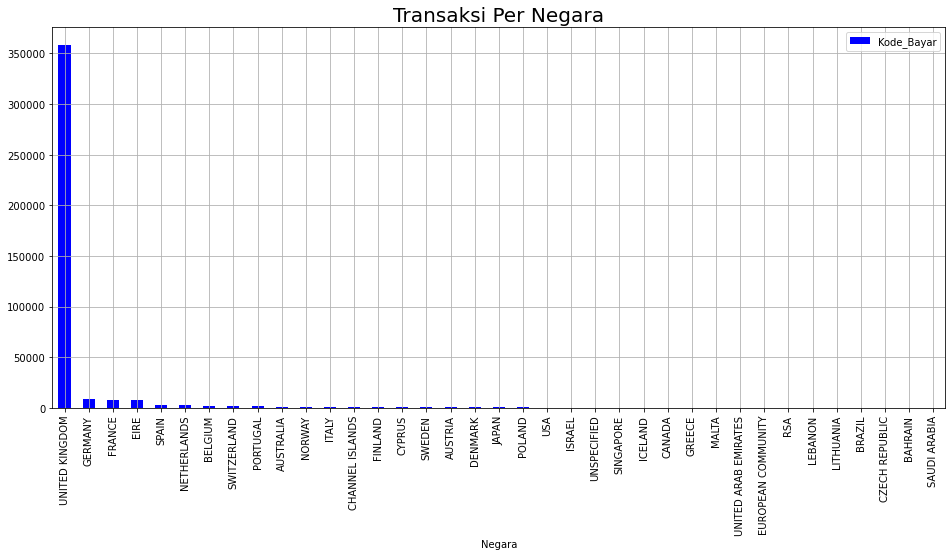

In [39]:
plt.rcParams['figure.figsize'] = (16, 7)
color = plt.cm.magma(np.linspace(0, 1, 40))
Kel_Negara.plot.bar(color = 'blue')
plt.title('Transaksi Per Negara', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

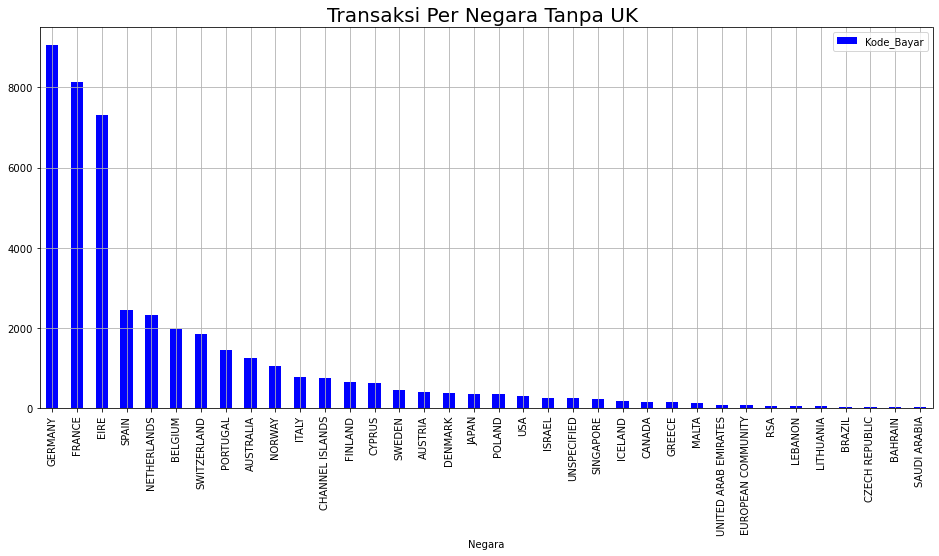

In [40]:
plt.rcParams['figure.figsize'] = (16, 7)
color = plt.cm.magma(np.linspace(0, 1, 40))
Kel_Negara[Kel_Negara.index != 'UNITED KINGDOM'].plot.bar(color = 'blue')
plt.title('Transaksi Per Negara Tanpa UK ', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [41]:
data1['Barang'].unique()

array(['CREAM HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'SET OF 6 RIBBONS PERFECTLY PRETTY', 'SET OF 6 RIBBONS PARTY',
       'PINK CRYSTAL SKULL PHONE CHARM'], dtype=object)

In [42]:
Barang1 = data1['Barang'].value_counts().head(15)
Barang1.head()

CREAM HANGING HEART T-LIGHT HOLDER    2077
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Barang, dtype: int64

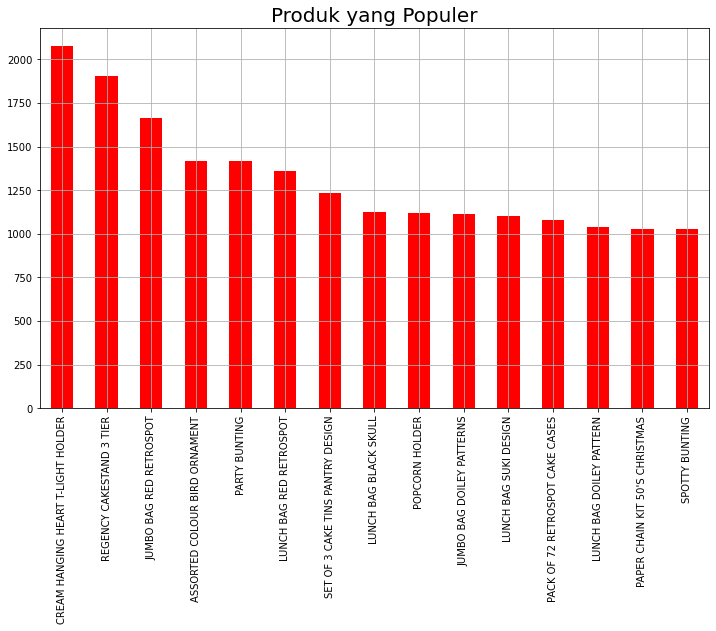

In [43]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.magma(np.linspace(0, 1, 40))
Barang1.plot.bar(color = 'red')
plt.title('Produk yang Populer', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [44]:
data1['Kode_Pelanggan'].nunique()

4361

In [45]:
Kel_Pelanggan = data1[['Kode_Pelanggan', 'Kode_Bayar']].groupby('Kode_Pelanggan').count().sort_values('Kode_Bayar', axis=0, ascending=False)
Kel_Pelanggan.head(15)

,Kode_Bayar
Kode_Pelanggan,
C17841,7878
C14911,5771
C14096,5005
C12748,4583
C14606,2664
C15311,2461
C14646,2051
C13089,1832
C13263,1637


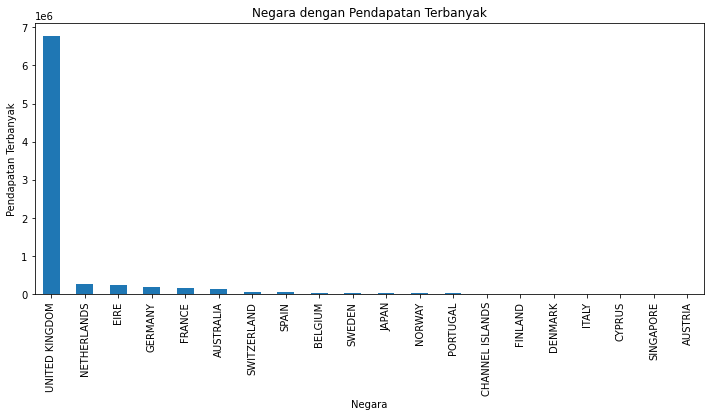

In [46]:
plt.figure(figsize=(12,5))
cities = data1.groupby('Negara')['Total'].sum().sort_values(ascending=False).head(20)
cities.plot(kind = 'bar')
plt.title('Negara dengan Pendapatan Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Pendapatan Terbanyak')
plt.show()

In [47]:
data1.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang,Tahun,Bulan,Jam,Bulan_Tahun,Total
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,C17850,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER,2010,12,8,2010-12,15.30
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,WHITE METAL LANTERN,2010,12,8,2010-12,20.34
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,C17850,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER,2010,12,8,2010-12,22.00
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,8,2010-12,20.34
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART,2010,12,8,2010-12,20.34


In [48]:
data1.groupby(['Tahun'])['Total'].sum()

Tahun
2010    5.474349e+05
2011    7.686475e+06
Name: Total, dtype: float64

<AxesSubplot:xlabel='Tahun'>

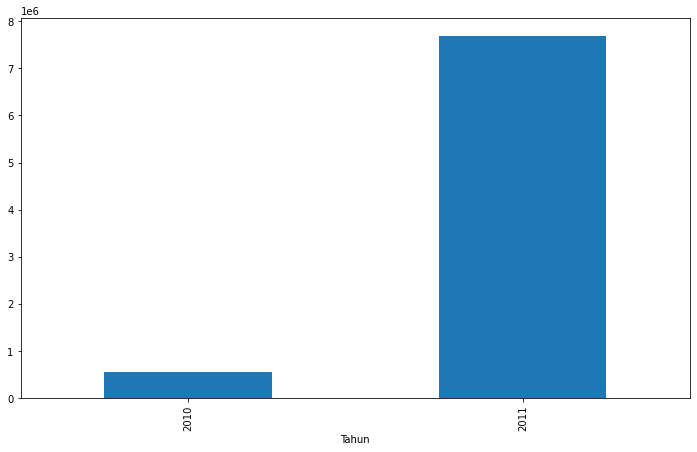

In [49]:
data1.groupby(['Tahun'])['Total'].sum().plot(kind='bar')

In [50]:
data1.groupby(['Bulan_Tahun'])['Total'].sum()

Bulan_Tahun
2010-12     547434.87
2011-01     474633.61
2011-02     429188.87
2011-03     569501.25
2011-04     421088.62
2011-05     652171.21
2011-06     634220.41
2011-07     585607.23
2011-08     619703.88
2011-09     902433.89
2011-10     972913.96
2011-11    1127837.31
2011-12     297174.71
Name: Total, dtype: float64

<AxesSubplot:xlabel='Bulan_Tahun'>

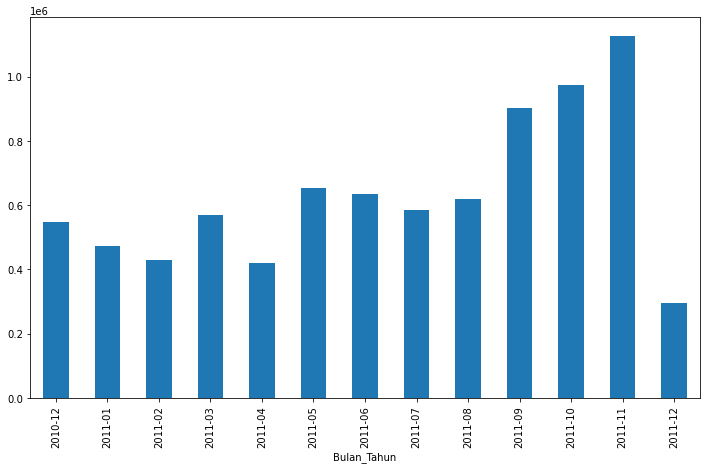

In [51]:
data1.groupby(['Bulan_Tahun'])['Total'].sum().plot(kind='bar')

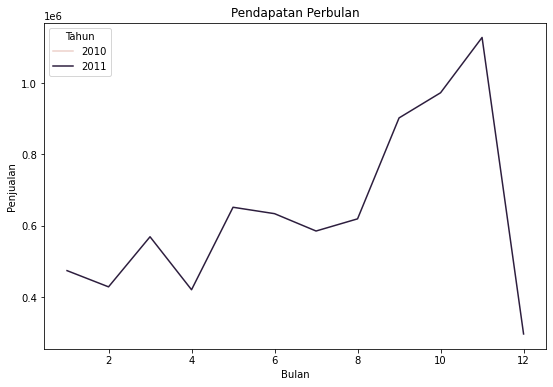

In [52]:
plt.figure(figsize=(9,6))

monthly_revenue = data1.groupby(["Tahun", "Bulan"])["Total"].sum().reset_index()
monthly_revenue
sns.lineplot(x="Bulan", y="Total",hue="Tahun", data=monthly_revenue)
plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.title('Pendapatan Perbulan')
plt.show()

In [53]:
Pelanggan = data1[['Kode_Pelanggan','Total']].groupby('Kode_Pelanggan').mean().sort_values('Total', ascending=False).head(10)
Pelanggan

,Total
Kode_Pelanggan,
C15098,9904.875000
C15195,3861.000000
C13135,3096.000000
C16532,1687.200000
C15749,1435.726667
C16000,1377.077778
C16754,1001.200000
C18133,931.500000
C12798,872.130000


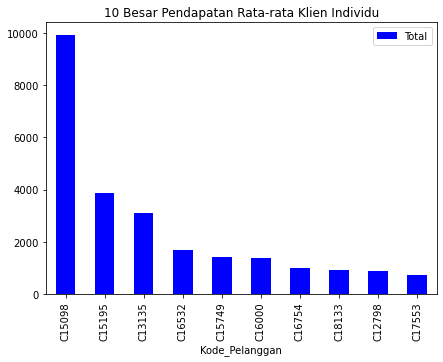

In [54]:
Pelanggan.plot(kind='bar', figsize=(7,5), color=['blue'], title='10 Besar Pendapatan Rata-rata Klien Individu')
plt.show()

In [55]:
aktif_perbulan = data1.groupby(['Bulan'])['Kode_Pelanggan'].nunique().reset_index()
aktif_perbulan

,Bulan,Kode_Pelanggan
0,1,781
1,2,795
2,3,1024
3,4,898
4,5,1086
5,6,1040
6,7,985
7,8,978
8,9,1289
9,10,1443


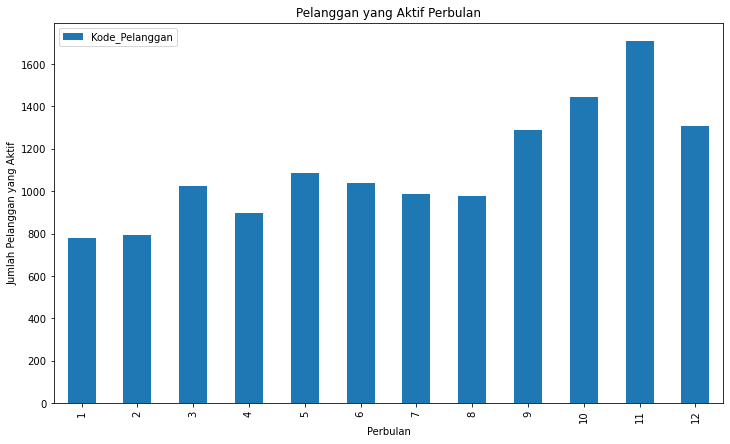

<Figure size 360x288 with 0 Axes>

In [56]:
aktif_perbulan.plot(kind='bar',x='Bulan',y='Kode_Pelanggan')
plt.title('Pelanggan yang Aktif Perbulan')
plt.xlabel('Perbulan')
plt.ylabel('Jumlah Pelanggan yang Aktif')
plt.xticks(rotation=90)
plt.figure(figsize=(5,4))
plt.show()

In [57]:
data1.groupby('Jam')['Kode_Bayar'].nunique()

Jam
6        4
7       41
8      646
9     1467
10    2525
11    3015
12    4212
13    3827
14    3180
15    2582
16    1561
17     932
18     204
19     223
20      57
Name: Kode_Bayar, dtype: int64

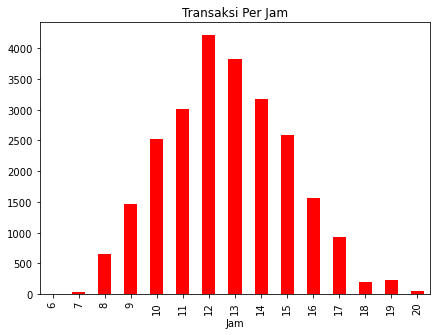

In [58]:
data1.groupby('Jam')['Kode_Bayar'].nunique().plot(kind='bar', figsize=(7,5), color=['red'], title='Transaksi Per Jam')
plt.show()

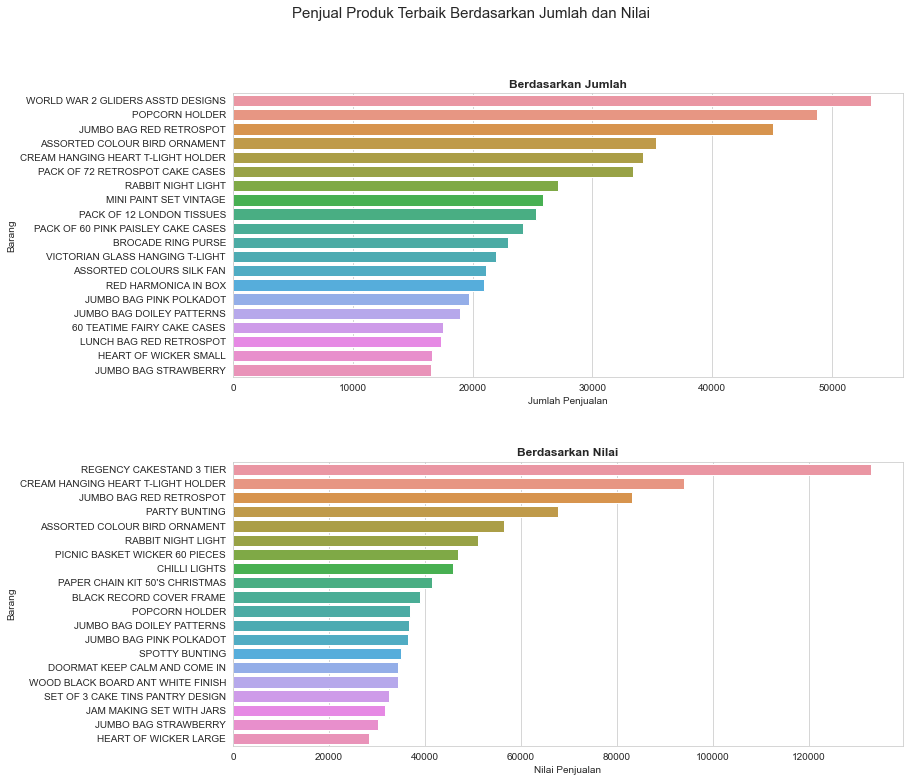

In [65]:
#top 20 products by quantity and finalprice
sns.set_style('whitegrid')
Top20_Jumlah= data1.groupby('Barang')['Jumlah'].agg('sum').sort_values(ascending=False)[0:20]
Top20_Harga = data1.groupby('Barang')['Total'].agg('sum').sort_values(ascending=False)[0:20]
#creating the subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Penjual Produk Terbaik Berdasarkan Jumlah dan Nilai', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=Top20_Jumlah.values, y=Top20_Jumlah.index, ax= axs[0]).set(xlabel='Jumlah Penjualan')
axs[0].set_title('Berdasarkan Jumlah', size=12, fontweight = 'bold')
sns.barplot(x=Top20_Harga.values, y=Top20_Harga.index, ax= axs[1]).set(xlabel='Nilai Penjualan')
axs[1].set_title('Berdasarkan Nilai', size=12, fontweight = 'bold')
plt.show()

<ipython-input-70-15f5d787f684>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Top10_Jumlah = data1.groupby('Barang',as_index=False)['Jumlah','Total'].sum().sort_values(by='Jumlah',ascending=False).head(10)


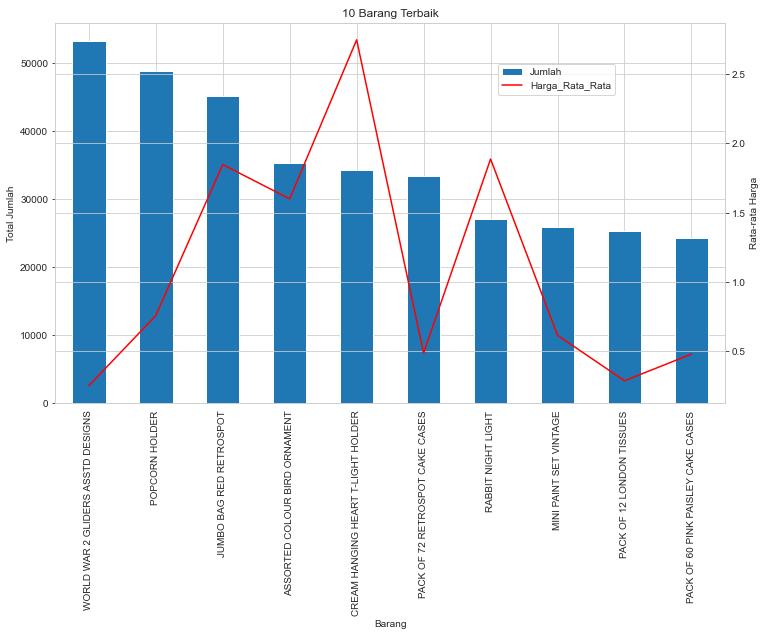

In [70]:
Top10_Jumlah = data1.groupby('Barang',as_index=False)['Jumlah','Total'].sum().sort_values(by='Jumlah',ascending=False).head(10)
Top10_Jumlah['Harga_Rata_Rata'] = Top10_Jumlah.Total/Top10_Jumlah.Jumlah 

# Plot top 10 most popular items

ax = Top10_Jumlah.plot(x="Barang", y="Jumlah", legend=False,kind='bar')
ax2 = ax.twinx()
Top10_Jumlah.plot(x="Barang", y="Harga_Rata_Rata", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('10 Barang Terbaik')
ax.set_ylabel('Total Jumlah')
ax2.set_ylabel('Rata-rata Harga')
plt.show()

<ipython-input-71-d5dc1eb7c9a4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Top10_Pendapatan= data1.groupby('Barang',as_index=False)['Total','Jumlah'].sum().sort_values(by='Total', ascending=False).head(10)


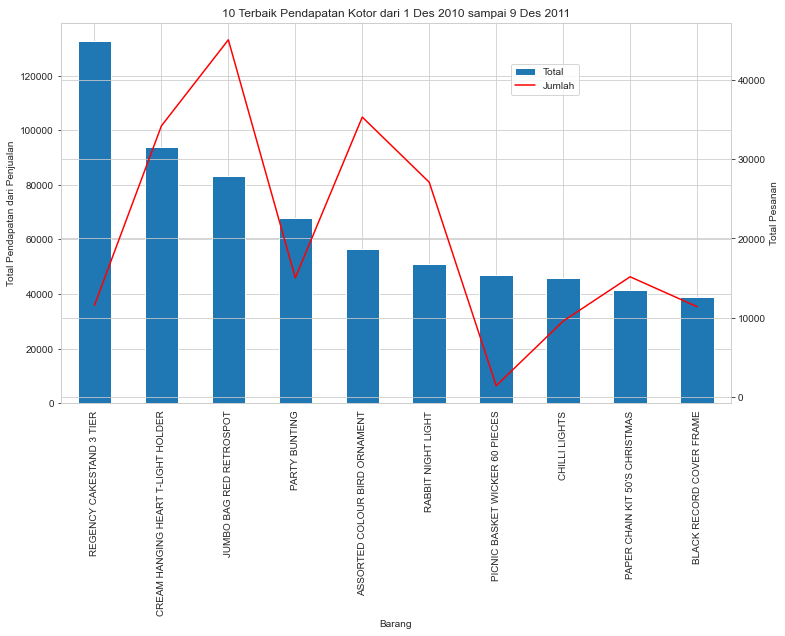

In [71]:
Top10_Pendapatan= data1.groupby('Barang',as_index=False)['Total','Jumlah'].sum().sort_values(by='Total', ascending=False).head(10)
Top10_Pendapatan['Rata-rata_Harga_Satuan'] = Top10_Pendapatan.Total/Top10_Pendapatan.Jumlah

# Total Pendatapan
Total_Pendapatan = round(df.Total.sum(),0)

# Plot top 10 pendapatan penjualan
ax = Top10_Pendapatan.plot(x="Barang", y="Total", legend=False,kind='bar')
ax2 = ax.twinx()
Top10_Pendapatan.plot(x="Barang", y="Jumlah", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('10 Terbaik Pendapatan Kotor dari 1 Des 2010 sampai 9 Des 2011')
ax.set_ylabel('Total Pendapatan dari Penjualan')
ax2.set_ylabel('Total Pesanan')
plt.show()

In [76]:
data1['Frekuensi'] = data1.groupby('Kode_Pelanggan')['Kode_Pelanggan'].transform('count')

In [77]:
Pelanggan=pd.DataFrame(data1.groupby(['Kode_Pelanggan'])['Total'].sum().sort_values(ascending=False)).reset_index().head(10)
Pelanggan['Kode_Pelanggan'].tolist()

['C14646',
 'C18102',
 'C17450',
 'C14911',
 'C12415',
 'C14156',
 'C17511',
 'C16684',
 'C13694',
 'C15311']

In [82]:
top_pelanggan=data1[data1['Kode_Pelanggan'].isin(Pelanggan['Kode_Pelanggan'].tolist())][['Kode_Pelanggan','Negara', 'Total', 'Jumlah', 'Frekuensi']]
top_pelanggan['Negara'].unique().tolist()

['UNITED KINGDOM', 'EIRE', 'NETHERLANDS', 'AUSTRALIA']

In [85]:
df_UK = data1[data1['Negara'] == "UNITED KINGDOM"]
df_UK.head()

,Kode_Bayar,Kode_Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Barang,Tahun,Bulan,Jam,Bulan_Tahun,Total,freq,Frekuensi
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,C17850,UNITED KINGDOM,CREAM HANGING HEART T-LIGHT HOLDER,2010,12,8,2010-12,15.30,312,312
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,WHITE METAL LANTERN,2010,12,8,2010-12,20.34,312,312
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,C17850,UNITED KINGDOM,CREAM CUPID HEARTS COAT HANGER,2010,12,8,2010-12,22.00,312,312
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,KNITTED UNION FLAG HOT WATER BOTTLE,2010,12,8,2010-12,20.34,312,312
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,C17850,UNITED KINGDOM,RED WOOLLY HOTTIE WHITE HEART,2010,12,8,2010-12,20.34,312,312


In [86]:
print(df_UK['Tanggal_Transaksi'].min())
print(df_UK['Tanggal_Transaksi'].max())

2010-12-01 08:26:00
2011-12-08 13:47:00


In [87]:
presence = dt.datetime(2011,12,10)
df_UK['Tanggal_Transaksi'] = pd.to_datetime(df_UK['Tanggal_Transaksi'])

<ipython-input-87-deddfe9b31eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['Tanggal_Transaksi'] = pd.to_datetime(df_UK['Tanggal_Transaksi'])


In [89]:
rfm = df_UK.groupby('Kode_Pelanggan').agg({'Tanggal_Transaksi': lambda x: (presence - x.max()).days, 'Kode_Bayar': lambda x: len(x), 'Total': lambda x: x.sum()})
rfm['Tanggal_Transaksi'] = rfm['Tanggal_Transaksi'].astype(int)
rfm.rename(columns={'Tanggal_Transaksi':'recency', 'Kode_Bayar': 'frequency','Total': 'monetary_value'}, inplace=True)
rfm.head()

,recency,frequency,monetary_value
Kode_Pelanggan,,,
C12346,326,2,0.00
C12747,3,103,4196.01
C12748,1,4583,30124.43
C12749,4,228,3772.90
C12820,3,59,942.34


In [91]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
rfm_segments= rfm

In [92]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [94]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [97]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Kode_Pelanggan,,,,,,,
C12346,326,2,0.00,4,4,4,444
C12747,3,103,4196.01,1,1,1,111
C12748,1,4583,30124.43,1,1,1,111
C12749,4,228,3772.90,1,1,1,111
C12820,3,59,942.34,1,2,2,122


In [98]:
rfm_segments['RFMClass'].unique()

array(['444', '111', '122', '322', '341', '333', '133', '231', '233',
       '433', '311', '212', '332', '321', '223', '222', '324', '312',
       '422', '343', '344', '211', '411', '423', '443', '243', '142',
       '234', '121', '221', '131', '134', '334', '213', '112', '244',
       '143', '434', '144', '132', '113', '432', '431', '331', '242',
       '342', '424', '441', '323', '123', '232', '442', '224', '124',
       '412', '241', '313', '413', '421', '141', '114'], dtype=object)

In [99]:
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Kode_Pelanggan,,,,,,,
C12346,326,2,0.00,4,4,4,444
C12747,3,103,4196.01,1,1,1,111
C12748,1,4583,30124.43,1,1,1,111
C12749,4,228,3772.90,1,1,1,111
C12820,3,59,942.34,1,2,2,122


In [101]:
print("Pelanggan_Terbaik: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Pelanggan_Loyal: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Pembelanja_Terbanyak: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('Pelanggan_Hampir_Berhenti: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Pelanggan_Berhenti: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

Pelanggan_Terbaik:  419 ( 10.63 %)
Pelanggan_Loyal:  976 ( 24.77 %)
Pembelanja_Terbanyak:  985 ( 24.99 %)
Pelanggan_Hampir_Berhenti:  140 ( 3.55 %)
Pelanggan_Berhenti:  354 ( 8.98 %)
